In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Customers.csv')

In [ ]:
df.head()

In [91]:
df.shape

(2000, 8)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [93]:
df['Profession'].value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

In [94]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [95]:
#prepare the data to take only numerical featrures and separate input and target
df_input=df[['CustomerID', 'Gender', 'Age', 'Annual Income ($)', 'Profession', 'Work Experience','Family Size']]
df_target=df[['Spending Score (1-100)']]

#split training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_input, df_target, test_size=0.2, random_state=42)

In [96]:
X_train['Profession'].fillna('others', inplace=True)
X_test['Profession'].fillna('others', inplace=True)

In [97]:
#encode non numeric data into numeric data
#encode Gender
train_encode={"Gender": {"Male":1,"Female" :0}}
test_encode={"Gender": {"Male":1,"Female" :0}}

#replace categorical value into numerical value
X_train=X_train.replace(train_encode)
X_test=X_test.replace(test_encode)


In [98]:
from sklearn.preprocessing import OneHotEncoder
#encoded profession for training data
x=X_train[['Profession']]
train_encoded=OneHotEncoder()
train_data=pd.DataFrame(train_encoded.fit_transform(x).toarray(),columns=train_encoded.get_feature_names_out())
X_train=X_train.reset_index()
X_train_enc=pd.concat([X_train,train_data], axis=1)



In [99]:
X_train_enc.head()

,index,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_others
0,968,969,1,32,186897,Healthcare,1,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,240,241,1,92,83000,Executive,1,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,819,820,0,19,117477,Healthcare,6,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,692,693,1,83,132005,Entertainment,0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,420,421,1,89,122430,Healthcare,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [100]:
#encoded profession for testing data
y=X_test[['Profession']]
test_data=pd.DataFrame(train_encoded.transform(y).toarray(),columns=train_encoded.get_feature_names_out())
X_test=X_test.reset_index()
X_test_enc=pd.concat([X_test,test_data], axis=1)

In [101]:
X_test_enc.head()

,index,CustomerID,Gender,Age,Annual Income ($),Profession,Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_others
0,1860,1861,1,32,104494,Healthcare,6,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,353,354,1,23,181760,Healthcare,14,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1333,1334,0,97,133614,Artist,7,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,905,906,0,66,118385,Healthcare,10,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1289,1290,0,75,86297,Executive,9,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [102]:
X_train_enc.columns

Index(['index', 'CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Profession', 'Work Experience', 'Family Size', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Profession_others'],
      dtype='object')

In [103]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1600 non-null   int64  
 1   CustomerID                1600 non-null   int64  
 2   Gender                    1600 non-null   int64  
 3   Age                       1600 non-null   int64  
 4   Annual Income ($)         1600 non-null   int64  
 5   Profession                1600 non-null   object 
 6   Work Experience           1600 non-null   int64  
 7   Family Size               1600 non-null   int64  
 8   Profession_Artist         1600 non-null   float64
 9   Profession_Doctor         1600 non-null   float64
 10  Profession_Engineer       1600 non-null   float64
 11  Profession_Entertainment  1600 non-null   float64
 12  Profession_Executive      1600 non-null   float64
 13  Profession_Healthcare     1600 non-null   float64
 14  Professi

In [104]:
X_train_enc=X_train_enc[['Gender', 'Age', 'Annual Income ($)','Work Experience', 'Family Size', 'Profession_Artist',
                         'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
                         'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
                         'Profession_Lawyer', 'Profession_Marketing', 'Profession_others']]
X_test_enc=X_test_enc[['Gender', 'Age', 'Annual Income ($)','Work Experience', 'Family Size', 'Profession_Artist',
                         'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
                         'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
                         'Profession_Lawyer', 'Profession_Marketing', 'Profession_others']]

In [105]:
import torch
import torch.nn as nn
 
# Define the model
model = nn.Sequential(
    nn.Linear(15, 16),
    nn.Sigmoid(),
    nn.Linear(16, 15),
    nn.Sigmoid(),
    nn.Linear(15, 1),
)

In [106]:
import torch.nn as nn
import torch.optim as optim
 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [107]:
#data preparation
X_train = torch.tensor(X_train_enc.values)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values).reshape(-1, 1)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test_enc.values)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values).reshape(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [108]:
y_train.shape

torch.Size([1600, 1])

In [109]:
import tqdm
import copy
# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
# training loop
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)

<All keys matched successfully>

MSE: 1498.54
RMSE: 38.71


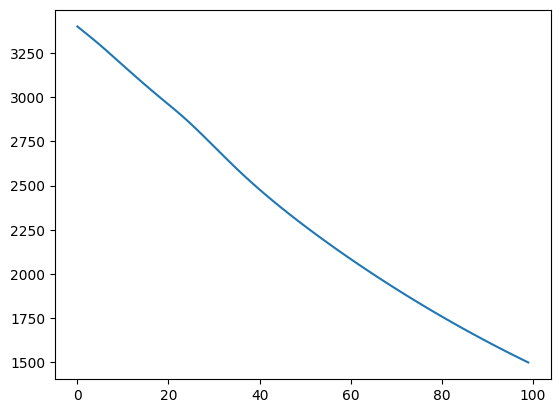

In [110]:
import matplotlib.pyplot as plt
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [111]:
from torcheval.metrics import R2Score
metric = R2Score()
metric.update(y_pred, y_test)
metric.compute()

tensor(-0.9529)